In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.layers import BatchNormalization, Conv2D, UpSampling2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras import regularizers
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [3]:
def get_unet():
    concat_axis = 3
    inputs = layers.Input(shape = (80, 120, 3))

    bn0 = BatchNormalization(axis=3)(inputs)
    conv1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same', name='conv1_1')(bn0)
    bn1 = BatchNormalization(axis=3)(conv1)
    conv1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(bn1)
    bn2 = BatchNormalization(axis=3)(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(bn2)
    conv2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    bn3 = BatchNormalization(axis=3)(conv2)
    conv2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(bn3)
    bn4 = BatchNormalization(axis=3)(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(bn4)

    conv3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    bn5 = BatchNormalization(axis=3)(conv3)
    conv3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(bn5)
    bn6 = BatchNormalization(axis=3)(conv3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(bn6)

    conv4 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    bn7 = BatchNormalization(axis=3)(conv4)
    conv4 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(bn7)
    bn8 = BatchNormalization(axis=3)(conv4)
    pool4 = layers.MaxPooling2D(pool_size=(2, 3))(bn8)

    conv5 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    bn9 = BatchNormalization(axis=3)(conv5)
    conv5 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(bn9)
    bn10 = BatchNormalization(axis=3)(conv5)

    up_conv5 = layers.UpSampling2D(size=(2, 3))(bn10)
    up6 = layers.concatenate([up_conv5, conv4], axis=concat_axis)
    conv6 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    bn11 = BatchNormalization(axis=3)(conv6)
    conv6 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(bn11)
    bn12 = BatchNormalization(axis=3)(conv6)

    up_conv6 = layers.UpSampling2D(size=(2, 2))(bn12)
    up7 = layers.concatenate([up_conv6, conv3], axis=concat_axis)
    conv7 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    bn13 = BatchNormalization(axis=3)(conv7)
    conv7 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(bn13)
    bn14 = BatchNormalization(axis=3)(conv7)

    up_conv7 = layers.UpSampling2D(size=(2, 2))(bn14)
    up8 = layers.concatenate([up_conv7, conv2], axis=concat_axis)
    conv8 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    bn15 = BatchNormalization(axis=3)(conv8)
    conv8 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(bn15)
    bn16 = BatchNormalization(axis=3)(conv8)

    up_conv8 = layers.UpSampling2D(size=(2, 2))(bn16)
    up9 = layers.concatenate([up_conv8, conv1], axis=concat_axis)
    conv9 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    bn17 = BatchNormalization(axis=3)(conv9)
    conv9 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(bn17)
    bn18 = BatchNormalization(axis=3)(conv9)

    conv10 = layers.Conv2D(1, (1, 1))(bn18)
    #bn19 = BatchNormalization(axis=3)(conv10)

    model = models.Model(inputs=inputs, outputs=conv10)

    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='mae', optimizer=sgd, metrics=['mse'])
    #model.compile(loss='mae', optimizer=Adam(lr=0.001), metrics=['mse'])
    print(model.summary())

    return model

In [4]:
model = get_unet()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 80, 120, 3)] 0                                            
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 80, 120, 3)   12          input_1[0][0]                    
__________________________________________________________________________________________________
conv1_1 (Conv2D)                (None, 80, 120, 32)  896         batch_normalization[0][0]        
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 80, 120, 32)  128         conv1_1[0][0]                    
______________________________________________________________________________________________

In [5]:
x_train = np.load("/opt/datos/dataset/larraondo/x_train-0_2_6_validation.npy")
x_val = np.load("/opt/datos/dataset/larraondo/x_val-0_2_6_validation.npy")
x_test = np.load("/opt/datos/dataset/larraondo/x_test-0_2_6_validation.npy")
y_train = np.load("/opt/datos/dataset/larraondo/y_train-0_2_6_validation.npy")
y_val = np.load("/opt/datos/dataset/larraondo/y_val-0_2_6_validation.npy")
y_test = np.load("/opt/datos/dataset/larraondo/y_test-0_2_6_validation.npy")

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

i=0
j=2
k=6

(34575, 80, 120, 3)
(8643, 80, 120, 3)
(10805, 80, 120, 3)
(34575, 80, 120, 1)
(8643, 80, 120, 1)
(10805, 80, 120, 1)


In [6]:
history = model.fit(x_train, y_train, epo chs=50, verbose=1, validation_data=(x_val, y_val))

Epoch 1/50
1081/1081 [==============================] - 283s 248ms/step - loss: 0.4331 - mse: 1.5132 - val_loss: 0.3512 - val_mse: 1.1269
Epoch 2/50
1081/1081 [==============================] - 249s 230ms/step - loss: 0.3394 - mse: 0.9861 - val_loss: 0.3223 - val_mse: 0.8865
Epoch 3/50
1081/1081 [==============================] - 249s 230ms/step - loss: 0.3118 - mse: 0.8238 - val_loss: 0.3058 - val_mse: 0.7894
Epoch 4/50
1081/1081 [==============================] - 249s 230ms/step - loss: 0.2960 - mse: 0.7424 - val_loss: 0.2923 - val_mse: 0.7178
Epoch 5/50
1081/1081 [==============================] - 249s 230ms/step - loss: 0.2866 - mse: 0.6963 - val_loss: 0.2848 - val_mse: 0.6726
Epoch 6/50
1081/1081 [==============================] - 249s 230ms/step - loss: 0.2793 - mse: 0.6583 - val_loss: 0.2782 - val_mse: 0.6551
Epoch 7/50
1081/1081 [==============================] - 249s 230ms/step - loss: 0.2721 - mse: 0.6244 - val_loss: 0.2764 - val_mse: 0.6582
Epoch 8/50
1081/1081 [============

In [8]:
with open('/opt/datos/entrenamientos/larraondo/trainHistoryDict_unet_val_{}-{}-{}'.format(i, j, k), 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

In [9]:
history = pickle.load( open( "/opt/datos/entrenamientos/larraondo/trainHistoryDict_unet_val_0-2-6", "rb" ) )

In [11]:
import matplotlib.pyplot as plt

~ Dataset dividido correctamente ~
val_loss: 0.23882867395877838
loss: 0.1906137466430664


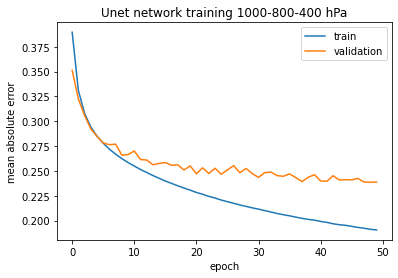

In [14]:
print("~ Dataset dividido correctamente ~")
print(f"val_loss: {history['val_loss'][-1]}")
print(f"loss: {history['loss'][-1]}")
#print(history)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Unet network training 1000-800-400 hPa')
plt.ylabel('mean absolute error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [13]:
model.save('/opt/datos/entrenamientos/larraondo/unet_val_0-2-6.h5')